# Relax Data Science Take-Home Challenge
# Michael Phillips

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
user_df = pd.read_csv('takehome_users.csv', encoding='latin-1')
eng_df = pd.read_csv('takehome_user_engagement.csv', encoding='utf_8')

In [3]:
eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
user_df.rename(columns={'object_id':'user_id'},inplace=True)
user_df.drop('last_session_creation_time', inplace=True, axis=1)
user_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0


In [5]:
eng_df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [6]:
eng_df['time_stamp'] = pd.to_datetime(eng_df['time_stamp'])

In [7]:
eng_df.set_index('time_stamp',inplace=True)
eng_df.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [8]:
# groupby user, look at 7 day rolling period for each user
# if the user visited 3+ times in a period, count visits
rs_df = eng_df.groupby('user_id').rolling('7D', min_periods=3).sum().fillna(0)

In [9]:
rs_df.rename(columns={'user_id':'user'},inplace=True)
rs_df.reset_index(inplace=True)

In [10]:
rs_df.drop('user', inplace=True, axis=1)
rs_df.head()

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,0.0
2,2,2013-11-29 03:45:04,0.0
3,2,2013-12-09 03:45:04,0.0
4,2,2013-12-25 03:45:04,0.0


In [11]:
# find the users that meet the given criteria for 'adopted users' - 
# 3 visits in a 7 day period
# NOTE: the time stamp column represents the previous 7 days from the date shown

adpt_user = rs_df.loc[rs_df['visited'] >= 3]
adpt_user.head()

,user_id,time_stamp,visited
9,2,2014-02-09 03:45:04,3.0
10,2,2014-02-13 03:45:04,3.0
27,10,2013-02-19 22:08:03,3.0
30,10,2013-03-02 22:08:03,3.0
31,10,2013-03-05 22:08:03,3.0


In [12]:
# get unique list of users
users = list(adpt_user.user_id.unique())

In [13]:
print(len(users))
print(len(user_df))

1602
12000


Out of 12,000 total users, 1602 are considered 'adopted users'.

Let's split the user dataframe into adopted users and unadopted users.

In [14]:
# create column of booleans
user_df['adopted_user'] = user_df['user_id'].isin(users)

In [15]:
user_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,False


In [16]:
# filter the data into two dataframes
adf = user_df.loc[user_df['adopted_user'] == True].copy()
ndf = user_df.loc[user_df['adopted_user'] == False].copy()

Just need to see where the differences lie now between the two sets of users.

In [17]:
mlist_a = (len(adf.loc[adf['opted_in_to_mailing_list'] == 1])) / len((adf.loc[adf['opted_in_to_mailing_list'] == 0]))
print('The percentage of adopted users who opted into the mailing list is %.2f%%' % (mlist_a*100))

The percentage of adopted users who opted into the mailing list is 34.85%


In [18]:
mlist_a = (len(ndf.loc[ndf['opted_in_to_mailing_list'] == 1])) / len((ndf.loc[ndf['opted_in_to_mailing_list'] == 0]))
print('The percentage of unadopted users who opted into the mailing list is %.2f%%' % (mlist_a*100))

The percentage of unadopted users who opted into the mailing list is 33.00%


Not a huge difference there. Marketing drip is up next.

In [19]:
mlist_a = (len(adf.loc[adf['enabled_for_marketing_drip'] == 1])) / len((adf.loc[adf['enabled_for_marketing_drip'] == 0]))
print('The percentage of adopted users who are enabled for the marketing drip is %.2f%%' % (mlist_a*100))

The percentage of adopted users who are enabled for the marketing drip is 18.14%


In [20]:
mlist_a = (len(ndf.loc[ndf['enabled_for_marketing_drip'] == 1])) / len((ndf.loc[ndf['enabled_for_marketing_drip'] == 0]))
print('The percentage of unadopted users who are enabled for the marketing drip is %.2f%%' % (mlist_a*100))

The percentage of unadopted users who are enabled for the marketing drip is 17.46%


Again, not a huge difference between users that are on the marketing drip or not.

Maybe it's the account creation field. I want to see if the ratio between the different creation sources is similar between the two groups of users.

In [21]:
adf['CS'] = adf['creation_source']
pd.pivot_table(adf, index='creation_source',values='CS', aggfunc='count')

,CS
creation_source,
GUEST_INVITE,360
ORG_INVITE,553
PERSONAL_PROJECTS,164
SIGNUP,293
SIGNUP_GOOGLE_AUTH,232


In [22]:
ndf['CS'] = ndf['creation_source']
pd.pivot_table(ndf, index='creation_source',values='CS', aggfunc='count')

,CS
creation_source,
GUEST_INVITE,1803
ORG_INVITE,3701
PERSONAL_PROJECTS,1947
SIGNUP,1794
SIGNUP_GOOGLE_AUTH,1153


In [23]:
# quick math to see percentages of users
# adopted users
print('GUEST INVITE: %.2f%%' % (360 / (360+553+164+293+232)*100))
print('ORG_INVITE: %.2f%%' % (553 / (360+553+164+293+232)*100))
print('PERSONAL PROJECTS: %.2f%%' % (164 / (360+553+164+293+232)*100))
print('SIGNUP: %.2f%%' % (293 / (360+553+164+293+232)*100))
print('GOOGLE SIGNUP: %.2f%%' % (232 / (360+553+164+293+232)*100))

GUEST INVITE: 22.47%
ORG_INVITE: 34.52%
PERSONAL PROJECTS: 10.24%
SIGNUP: 18.29%
GOOGLE SIGNUP: 14.48%


In [24]:
# quick math to see percentages of users
# unadopted users
print('GUEST INVITE: %.2f%%' % (1803 / (1803+3701+1947+1794+1153)*100))
print('ORG_INVITE: %.2f%%' % (3701 / (1803+3701+1947+1794+1153)*100))
print('PERSONAL PROJECTS: %.2f%%' % (1947 / (1803+3701+1947+1794+1153)*100))
print('SIGNUP: %.2f%%' % (1794 / (1803+3701+1947+1794+1153)*100))
print('GOOGLE SIGNUP: %.2f%%' % (1153 / (1803+3701+1947+1794+1153)*100))

GUEST INVITE: 17.34%
ORG_INVITE: 35.59%
PERSONAL PROJECTS: 18.72%
SIGNUP: 17.25%
GOOGLE SIGNUP: 11.09%


The percentage of people that use the service for personal projects is slightly higher for unadopted users, which could be a contributing factor.

How about account creation date?


In [25]:
apt = pd.pivot_table(adf, index='creation_time', values='user_id', aggfunc='count')
apt.reset_index(inplace=True)
apt.head()

,creation_time,user_id
0,2012-05-31 21:58:33,1
1,2012-06-01 20:02:35,1
2,2012-06-02 16:44:54,1
3,2012-06-02 20:35:05,1
4,2012-06-03 10:28:01,1


In [26]:
print(apt.creation_time.min())
print(apt.creation_time.max())

2012-05-31 21:58:33
2014-05-18 22:08:05


In [27]:
npt = pd.pivot_table(ndf, index='creation_time', values='user_id', aggfunc='count')
npt.reset_index(inplace=True)
npt.head()

,creation_time,user_id
0,2012-05-31 00:43:27,1
1,2012-05-31 01:42:31,1
2,2012-05-31 06:23:51,1
3,2012-05-31 08:20:06,1
4,2012-05-31 11:55:59,1


In [28]:
print(npt.creation_time.min())
print(npt.creation_time.max())

2012-05-31 00:43:27
2014-05-30 23:59:19


There is no clear differentiation between the two groups based on creation dates.

The last area I will look at is organizations.

In [29]:
orgapt = pd.pivot_table(adf, index='org_id', values='user_id', aggfunc='count')
orgapt.reset_index(inplace=True)
orgapt['adopted'] = 1
orgapt.head()

,org_id,user_id,adopted
0,0,11,1
1,1,14,1
2,2,15,1
3,3,14,1
4,4,16,1


In [30]:
orgnpt = pd.pivot_table(ndf, index='org_id', values='user_id', aggfunc='count')
orgnpt.reset_index(inplace=True)
orgnpt.rename(columns={'user_id':'user_id1'},inplace=True)
orgnpt.head()

,org_id,user_id1
0,0,308
1,1,219
2,2,186
3,3,154
4,4,143


In [31]:
org_m = pd.merge(orgapt, orgnpt, on='org_id')
org_m.head()

,org_id,user_id,adopted,user_id1
0,0,11,1,308
1,1,14,1,219
2,2,15,1,186
3,3,14,1,154
4,4,16,1,143


In [32]:
# see if any particular orgs have high adopted user rates
org_m['ad_rate'] = org_m['user_id'] / (org_m['user_id'] + org_m['user_id1'])
org_m.sort_values(by='ad_rate',inplace=True)
org_m.tail(15)

,org_id,user_id,adopted,user_id1,ad_rate
160,161,7,1,14,0.333333
368,381,4,1,8,0.333333
82,82,9,1,18,0.333333
310,318,6,1,11,0.352941
286,291,6,1,11,0.352941
284,289,6,1,11,0.352941
336,345,5,1,9,0.357143
117,117,8,1,14,0.363636
385,400,3,1,5,0.375000
379,392,6,1,10,0.375000


In [33]:
# whats the average rate
org_m.ad_rate.mean()

0.15627719565149176

## Machine Learning

In [34]:
user_df.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,False


In [134]:
# take out names/emails
cols = list(user_df.columns.values)
cols = ['org_id','creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
        'invited_by_user_id', 'adopted_user']
df = user_df[cols].copy()
df.head()

,org_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user
0,11,GUEST_INVITE,1,0,10803.0,False
1,1,ORG_INVITE,0,0,316.0,True
2,94,ORG_INVITE,0,0,1525.0,False
3,1,GUEST_INVITE,0,0,5151.0,False
4,193,GUEST_INVITE,0,0,5240.0,False


In [135]:
def user_check(row):
    if row['invited_by_user_id'] > 0:
        return 1
    else:
        return 0
    
def user_check2(row):
    if row['org_id'] > 0:
        return 1
    else:
        return 0

In [136]:
# use get_dummies to turn categorical variable to numerical
df = pd.get_dummies(df,columns=['creation_source'])

# create new column to show if a user was invited or not
df['invited_by_user_id'].fillna(0,inplace=True)
df['invited'] = df.apply(lambda row: user_check(row), axis=1)
df.drop('invited_by_user_id', axis=1, inplace=True)
df.head()

# create new column to show if if user belongs to an org
df['org'] = df.apply(lambda row: user_check2(row), axis=1)
df.drop('org_id', axis=1, inplace=True)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invited,org
0,1,0,False,1,0,0,0,0,1,1
1,0,0,True,0,1,0,0,0,1,1
2,0,0,False,0,1,0,0,0,1,1
3,0,0,False,1,0,0,0,0,1,1
4,0,0,False,1,0,0,0,0,1,1


In [137]:
# convert true/false to 0 and 1
# get values from df
df['adopted_user'] *= 1
y = df.adopted_user
y = np.ravel(y)
df.drop('adopted_user', axis=1, inplace=True)
X = df.values

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# use SSS to preserve ratio of classes
sss = StratifiedShuffleSplit(test_size=0.25)
sss.get_n_splits(X, y)

# split data into train/test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [153]:
# create classifier and parameter dict for gridsearch
clf = RandomForestClassifier(n_jobs=-1,random_state=20)

parameters = {'n_estimators':[35,45,50,60],
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_leaf':[5,20,30],
              'oob_score':[True, False],
              'class_weight':['balanced']}

from sklearn.model_selection import GridSearchCV

# use gridsearch to find best parameters
CV_rfc = GridSearchCV(estimator=clf, param_grid=parameters, cv=sss)
CV_rfc.fit(X_train,y_train)

# create new classifier from best parameters
rfc = CV_rfc.best_estimator_

#predict from test set
pred = rfc.predict(X_test)

from sklearn.metrics import classification_report

# use class values to see how the model performed
print(classification_report(y_test, pred))
acc_score = (accuracy_score(y_test, pred) * 100)
print("The model predicts %.2f%% of the users it tests correctly." % acc_score)

             precision    recall  f1-score   support

          0       0.88      0.53      0.66      2600
          1       0.15      0.54      0.24       400

avg / total       0.79      0.53      0.61      3000

The model predicts 53.33% of the users it tests correctly.


In [145]:
rfc

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=20, verbose=0, warm_start=False)

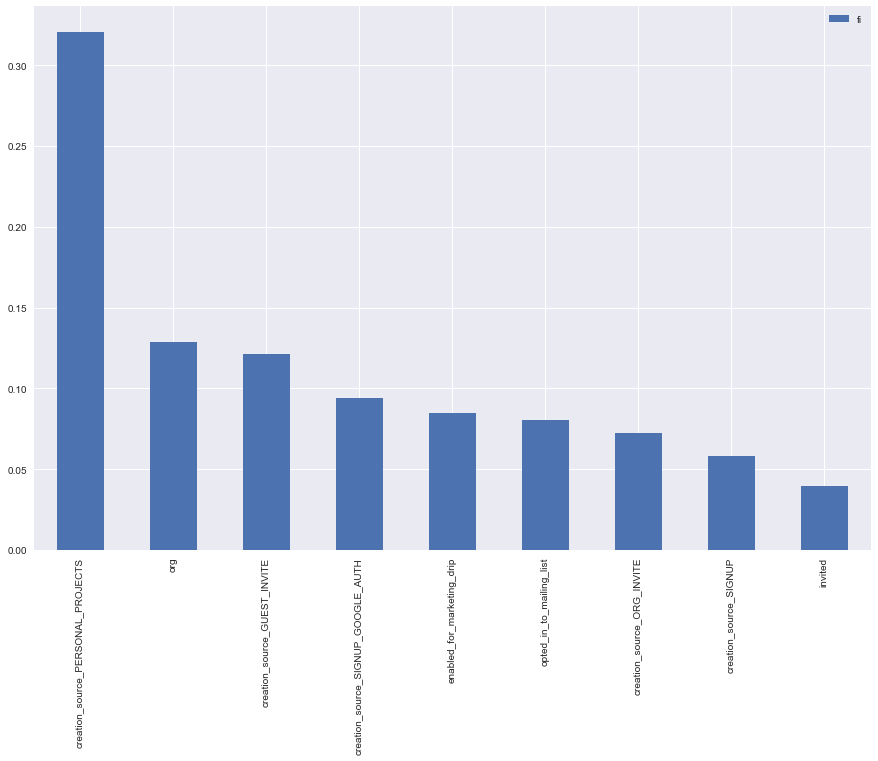

In [141]:
# graph the feature importances from the model
fi = rfc.feature_importances_
fi_df = pd.DataFrame({'fi':fi})

fi_names = list(df.columns.values)
fi_names_df = pd.DataFrame({'fi_names':fi_names})

fi_imp = fi_names_df.join(fi_df)
fi_imp = fi_imp.sort_values(by='fi',ascending=False)
fi_imp.reset_index(drop=True,inplace=True)

ax = fi_imp.plot(kind='bar',figsize=(15,10))
ax.set_xticklabels(fi_imp.fi_names);

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(class_weight='balanced')
model = model.fit(X_train,y_train)

In [152]:
model.score(X_test,y_test)

0.50466666666666671

In [154]:
# create classifier and parameter dict for gridsearch
clf = LogisticRegression(n_jobs=-1,random_state=20)

parameters = {'C':[0.001,0.01,0.1,1,10,100,1000]}

from sklearn.model_selection import GridSearchCV

# use gridsearch to find best parameters
CV_lrc = GridSearchCV(estimator=clf, param_grid=parameters, cv=sss)
CV_lrc.fit(X_train,y_train)

# create new classifier from best parameters
lrc = CV_lrc.best_estimator_

#predict from test set
pred = lrc.predict(X_test)

In [155]:
acc_score = (accuracy_score(y_test, pred) * 100)
print("The model predicts %.2f%% of the users it tests correctly." % acc_score)

The model predicts 86.67% of the users it tests correctly.


## Conclusion

It is hard to say conclusively why a user might become an adopted user or not from this data. The different areas of examination were nearly equivalent across the metrics. The biggest possible indicator (although not enough in my mind to explain the differences completely) was found in the account creation sources. There was a higher percentage of users that joined to work on personal projects amongst unadopted users, than adopted users.

Another strong possiblity lies with organization ID. There are some groups that have a higher rate of adoption among their users then other groups.

## Possible next steps

If I was working on this problem I would need to find additional areas to examine. My first thought would be to dive deeper into individual marketing campaigns to see if any were particularly effective.

Some other possibilities that might help explain why a user would become an adopted user:
- access device 
- access location (if possible to determine)
- research of which groups have higher adoption rates. This could include what field of business the group is in, demographics of the group, location.
- days of the week people log in